<a href="https://colab.research.google.com/github/NERO-UFV/AuRoRA/blob/reinforcementLearning/Projeto_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fazer conexão com o GitHub

# Algoritmos de Aprendizado por Reforço Aplicados à Navegação de Veículos Autônomos em Ambientes Estruturados
- Markov Decision Process
- Exploration/Explotation
- Mapeamento (Occupancy Grid, Loop Closure Detection)
- Planejamento de rotas
- Comunicação Python com LiDAR
- Política de Ações (Estabelecimento de métricas)
- Algoritmo 

# Carregando Bibliotecas

In [2]:
# Imports de avisos
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulacao de dados e calculos matematicos
import os
import pandas as pd
import numpy as np
import math, re, time
from get_dict import get_dict
from get_R_Q import initial_R
from get_R_Q import initial_Q
from get_result import get_result
# Import para manipulação das imagens
import matplotlib.pyplot as plt
from matplotlib import pyplot
import IPython.display as display
from PIL import Image
from skimage.transform import resize
import cv2

# Carregando o Dataset

In [ ]:
from google.colab import files  #biblioteca do google colab utilizada para importar arquivos 
uploaded=files.upload() #importa os arquivos

In [ ]:
import io  #biblioteca utilizada para tratar os comandos de entrada e saida
data = pd.read_csv(io.BytesIO(uploaded['graph_11.csv'])) # utilizado para importar o arquivo CSV que contém o banco de dados
# data = pd.read_csv("graph_12.csv")
graph = get_dict(data)

In [ ]:
data.head() #comando utilizado para mostrar as 5 primeiras colunas do dataframe

,original,connected,weight
0,1,5,13
1,1,2,5
2,1,3,7
3,2,3,14
4,2,5,2


Text(0.5, 0, 'Chegada')

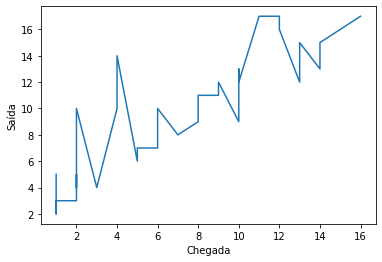

In [ ]:
# Isso aqui é só para dar uma ideia de como plotar 
plt.plot(data["original"],data["connected"])
plt.ylabel("Saída")
plt.xlabel("Chegada")

# Mapeamento

# Algoritmo Q-Rounting para rotas ótimas

In [ ]:
A = graph["A"]
Z = graph["Z"]
weight = graph["weight"]
A_Z_dict = graph["A_Z_dict"]

## Definir ponto de saída e chegada
start = 1
end = [25]

R = initial_R(A,Z,weight,A_Z_dict)
Q = initial_Q(R)

alpha = 0.7 # learning rate
epsilon = 0.1 #greedy policy
n_episodes = 1000

time0 = time.time()
result = get_result(R,Q,alpha,epsilon,n_episodes,start,end)
print("time is:",time.time() - time0)
print(result["all_routes"])

loop: 0
